In [742]:
import json
import pandas as pd
from datetime import datetime



index_lists=pd.read_json('clear_timeseries.json') # converts the json processed file into pandas dataframe

financial_lists=pd.read_json('clear_financials.json')

company_overview_list=pd.read_json('clear_overview.json')


#INSTRUCTIONS:
# index = '^GSPC' (S&P)>2000-2019, '^NDX' (Nasdaq)>2000-2019, '^DJI' (dowjones)>2004,2008,2009,2012,2013,2015,2017,2018,2019,2020
# year = 2000-2019
# parameter = 'priceToEarningsRatio' (P/E), 'marketCapitalization' (market cap), 'netIncome' (net income), 'Industry' (['Financial Data & Stock Exchanges', 'Telecom Services', 'Oil & Gas E&P', 'Pharmaceutical Retailers', 'Other', 'Software-Application', 'Internet Content & Information', 'Electrical Equipment & Parts', 'Insurance-Life', 'Semiconductor Equipment & Materials', 'Utilities-Regulated Gas', 'Staffing & Employment Services', 'Shell Companies', 'Biotechnology', 'Computer Hardware', 'Information Technology Services', 'Agricultural Inputs', 'Broadcasting', 'Specialty Retail', 'Resorts & Casinos', 'REIT-Office', 'Utilities-Regulated Water', 'Utilities-Regulated Electric', 'Electronic Components', 'Oil & Gas Integrated', 'Personal Services', 'Steel', 'Building Products & Equipment', 'Oil & Gas Equipment & Services', 'Semiconductors', 'Insurance Brokers', 'Aerospace & Defense', 'Software-Infrastructure', 'Asset Management', 'Credit Services', 'Consumer Electronics', 'Beverages-Non-Alcoholic', 'Oil & Gas Midstream', 'Tobacco', 'Healthcare Plans', 'Specialty Industrial Machinery', 'REIT-Healthcare Facilities', 'Gold', 'Trucking', 'Utilities-Diversified', 'Apparel Retail', 'Oil & Gas Drilling', 'Rental & Leasing Services', 'Scientific & Technical Instruments', 'Apparel Manufacturing', 'Industrial Distribution', 'Packaging & Containers', 'Electronic Gaming & Multimedia', 'Auto Parts', 'Capital Markets', 'Medical Care Facilities', 'Gambling', 'REIT-Retail', 'Communication Equipment', 'Internet Retail', 'Medical Devices', 'Integrated Freight & Logistics', 'Footwear & Accessories', 'Financial Conglomerates', 'Drug Manufacturers-Specialty & Generic', 'Restaurants', 'Specialty Business Services', 'Diagnostics & Research', 'Drug Manufacturers-General', 'Other Industrial Metals & Mining', 'Medical Instruments & Supplies', 'Specialty Chemicals', 'REIT-Industrial', 'Insurance-Property & Casualty', 'Packaged Foods', 'Security & Protection Services', 'Chemicals', 'Beverages-Brewers', 'Banks-Regional', 'Auto Manufacturers', 'Confectioners', 'Luxury Goods', 'Travel Services', 'Furnishings, Fixtures & Appliances', 'Entertainment', 'Consulting Services', 'Farm Products', 'Home Improvement Retail', 'Insurance-Specialty']),"Sector" ['Financial Services', 'Communication Services', 'Energy', 'Healthcare', 'Other', 'Technology', 'Industrials', 'Utilities', 'Basic Materials', 'Consumer Cyclical', 'Real Estate', 'Consumer Defensive'])
# criterion = 'highest'/'lowest'
# size = number of companies in the output portfolio ([0:20])

criterion_list=['highest','lowest','whole']
index_list=['^GSPC','^NDX','^DJI']
param_dict={'priceToEarningsRatio':'lowest', 'marketCapitalization':'highest', 'netIncome': 'highest', 'Industry': ['Financial Data & Stock Exchanges', 'Telecom Services', 'Oil & Gas E&P', 'Pharmaceutical Retailers', 'Other', 'Software-Application', 'Internet Content & Information', 'Electrical Equipment & Parts', 'Insurance-Life', 'Semiconductor Equipment & Materials', 'Utilities-Regulated Gas', 'Staffing & Employment Services', 'Shell Companies', 'Biotechnology', 'Computer Hardware', 'Information Technology Services', 'Agricultural Inputs', 'Broadcasting', 'Specialty Retail', 'Resorts & Casinos', 'REIT-Office', 'Utilities-Regulated Water', 'Utilities-Regulated Electric', 'Electronic Components', 'Oil & Gas Integrated', 'Personal Services', 'Steel', 'Building Products & Equipment', 'Oil & Gas Equipment & Services', 'Semiconductors', 'Insurance Brokers', 'Aerospace & Defense', 'Software-Infrastructure', 'Asset Management', 'Credit Services', 'Consumer Electronics', 'Beverages-Non-Alcoholic', 'Oil & Gas Midstream', 'Tobacco', 'Healthcare Plans', 'Specialty Industrial Machinery', 'REIT-Healthcare Facilities', 'Gold', 'Trucking', 'Utilities-Diversified', 'Apparel Retail', 'Oil & Gas Drilling', 'Rental & Leasing Services', 'Scientific & Technical Instruments', 'Apparel Manufacturing', 'Industrial Distribution', 'Packaging & Containers', 'Electronic Gaming & Multimedia', 'Auto Parts', 'Capital Markets', 'Medical Care Facilities', 'Gambling', 'REIT-Retail', 'Communication Equipment', 'Internet Retail', 'Medical Devices', 'Integrated Freight & Logistics', 'Footwear & Accessories', 'Financial Conglomerates', 'Drug Manufacturers-Specialty & Generic', 'Restaurants', 'Specialty Business Services', 'Diagnostics & Research', 'Drug Manufacturers-General', 'Other Industrial Metals & Mining', 'Medical Instruments & Supplies', 'Specialty Chemicals', 'REIT-Industrial', 'Insurance-Property & Casualty', 'Packaged Foods', 'Security & Protection Services', 'Chemicals', 'Beverages-Brewers', 'Banks-Regional', 'Auto Manufacturers', 'Confectioners', 'Luxury Goods', 'Travel Services', 'Furnishings, Fixtures & Appliances', 'Entertainment', 'Consulting Services', 'Farm Products', 'Home Improvement Retail', 'Insurance-Specialty'],"Sector":['Financial Services', 'Communication Services', 'Energy', 'Healthcare', 'Other', 'Technology', 'Industrials', 'Utilities', 'Basic Materials', 'Consumer Cyclical', 'Real Estate', 'Consumer Defensive']}
#parameter_list={'priceToEarningsRatio':'PERatio','marketCapitalization':'MarketCapitalization','netIncome':'EBITDA'} #net income replaced here by EBITDA

def create_portfolio(index,year,parameter,criterion,size):
    
    if (year>2019 or year <2000) or (index not in index_list) or ((parameter not in param_dict.keys()) and (parameter not in param_dict['Industry']) and (parameter not in param_dict['Sector'])) or ((size>20)  or (size <1)) or (criterion not in criterion_list):        
        print("Try again with valid inputs according to the text above.")
        return
    
    company_list=index_lists[index][year]
    
    output_list={}
    output_list_final=[]
    
    if index_lists.isnull()[index][year]:
        print("No info available. Try again with different index/year combination.")   #input data correction if necessary
        return
        
    if (parameter in param_dict['Industry']):
        for company in company_list:
            try:
                if company_overview_list[company]['Industry']==parameter:
                    output_list_final.append(company)
            except KeyError:
                        continue
    elif (parameter in param_dict['Sector']):
        for company in company_list:
            try:
                if company_overview_list[company]['Sector']==parameter:
                    output_list_final.append(company)
            except KeyError:
                        continue
    elif criterion!='whole': 
        
        for company in company_list:
            try:
                if not (financial_lists.isnull()[company].loc[year]):         # against NaN values in financial_lists
                    
                    try:
                        output_list[company]=((financial_lists[company].loc[year])[parameter])
                    
                    except Exception:
                        continue
            except KeyError:
                continue   
            
                    
        if criterion=='highest':
            output_list=sorted(output_list.items(), key=lambda x: x[1],reverse=True) 
            
        elif criterion =='lowest':
            output_list = dict((k, v) for k, v in output_list.items() if v >= 0)
            output_list=sorted(output_list.items(), key=lambda x: x[1])
            
  
        for x in range(size):
            output_list_final.append(output_list[x][0])
            
            
    if ((parameter in param_dict['Industry']) or (parameter in param_dict['Sector'])): 
        return(output_list_final)

    elif ((criterion=='whole') and (parameter not in param_dict['Industry']) and (parameter not in param_dict['Sector'])):
        return(company_list)
    
    else:
        return(output_list_final[0:size])
    

create_portfolio('^DJI',2019,'marketCapitalization','highest',5)        



['MSFT', 'JPM', 'JNJ', 'WMT', 'INTC']

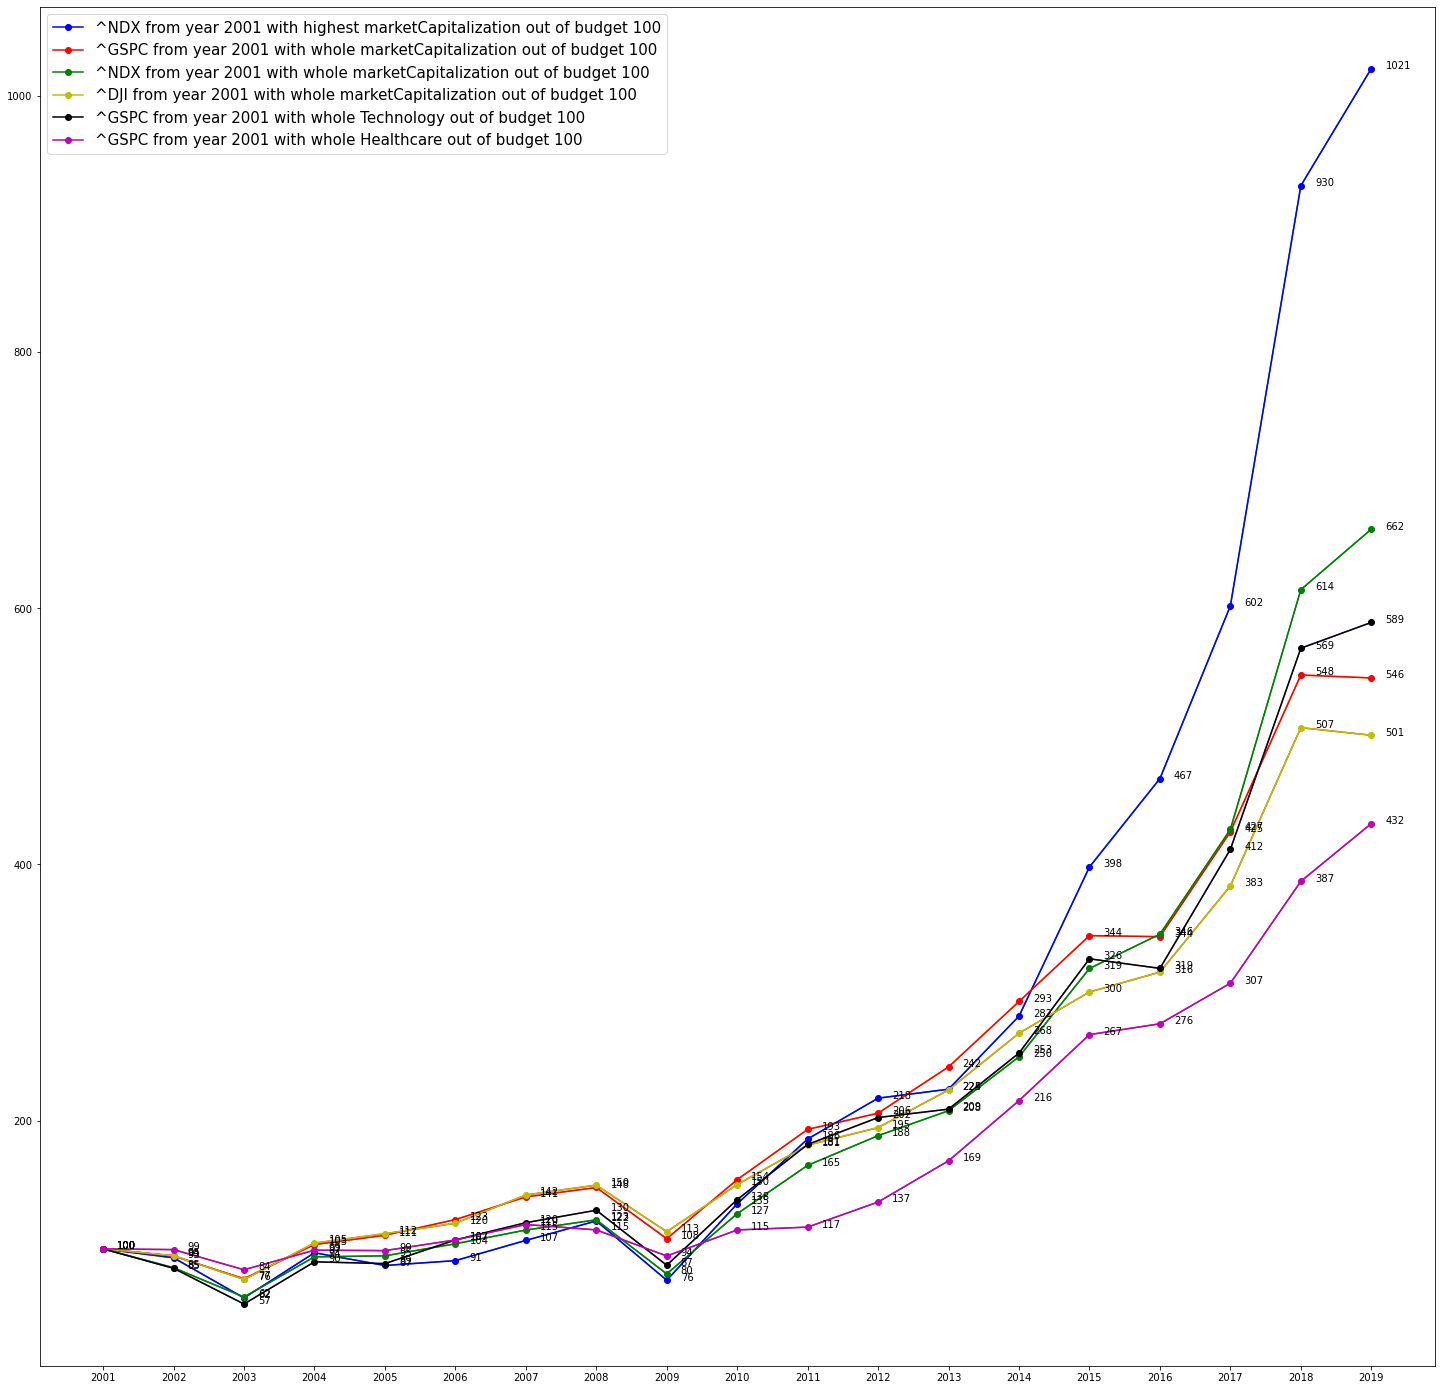

In [758]:
import matplotlib.pyplot as plt
import numpy as np

with open('clear_financials.json', 'r') as fin_f, \
    open('clear_time_series_monthly_adjusted.json', 'r') as month_f: 
    financials = json.load(fin_f)
    monthly_adjusted = json.load(month_f)
    
for company, prices in monthly_adjusted.items():
    temp = {}
    for date, price in prices.items():
        temp[datetime.strptime(date, '%Y-%m-%d')] = float(price)
    monthly_adjusted[company] = temp

def get_price_from_year_start(symbol, year):
    try:
        year_prices = {x: y for x, y in monthly_adjusted[symbol].items() if x.year==year}
        return year_prices[min(year_prices)]
    except Exception:

        return(0)

def get_companies_market_cap_dict(symbols, year):
    companies_cap = {}
    for symbol in symbols:
        try:
            companies_cap[symbol] = financials[symbol][str(year)]['marketCapitalization']
        except Exception:

            companies_cap[symbol]=0
       
    return companies_cap

def sell_portfolio(portfolio, year):
    amount = 0
    for symbol, num_shares in portfolio.items():
        amount += get_price_from_year_start(symbol, year)*num_shares
    return amount

def buy_portfolio(symbols, year, budget):
    companies_cap = get_companies_market_cap_dict(symbols, year)
    
    total_cap = sum(companies_cap.values())
    weight = budget / total_cap
    portfolio = {}
    for symbol, cap in companies_cap.items():
        price=get_price_from_year_start(symbol, year)
        price_1=get_price_from_year_start(symbol, year+1)
        if (price!=0) and (price_1!=0):
            
            portfolio[symbol] = (cap*weight)  / price  #for each symbol we have number of shares acquired
    
    return portfolio
    

def invest (index,start_year,parameter,criterion,size,budget):        

    portfolio_history={}
    portfolio_history[start_year]=budget
    portfolio_structure=[]
    
    for year in (range(start_year,2020)):          
        
        if year>start_year:
            portfolio_history[year]=sell_portfolio(portfolio,year)
        
        if year<2019:
            
            portfolio_structure=create_portfolio(index,year,parameter,criterion,size)
            
            portfolio=buy_portfolio(portfolio_structure,year,portfolio_history[year])
    
    return(portfolio_history,index,start_year,parameter,criterion,size,budget)
    
    
portfolio_history_SP,index_SP,year_start,parameter,criterion_whole,size,budget=invest('^GSPC',2001,'priceToEarningsRatio','whole',3,100)
portfolio_history_NAS,index_NAS,year_start,parameter,criterion_whole,size,budget=invest('^NDX',2001,'priceToEarningsRatio','whole',3,100)
portfolio_history_DJI,index_DJI,year_start,parameter,criterion_whole,size,budget=invest('^DJI',2001,'priceToEarningsRatio','whole',3,100)
portfolio_history_tech,index_SP,year_start,parameter_tech,criterion_whole,size,budget=invest('^GSPC',2001,'Technology','whole',3,100)
portfolio_history_health,index_SP,year_start,parameter_health,criterion_whole,size,budget=invest('^GSPC',2001,'Healthcare','whole',3,100)


portfolio_history,index,year_start,parameter,criterion,size_20,budget=invest('^NDX',2001,'marketCapitalization','highest',3,100)


variables=sorted(portfolio_history.items())
variables_SP=sorted(portfolio_history_SP.items())
variables_NAS=sorted(portfolio_history_NAS.items())
variables_DJI=sorted(portfolio_history_DJI.items())
variables_tech=sorted(portfolio_history_tech.items())
variables_health=sorted(portfolio_history_health.items())

(a, b) = zip(*variables) 
(c, d )= zip(*variables_SP)
(e, f )= zip(*variables_NAS)
(g, h )= zip(*variables_DJI)
(i, j )= zip(*variables_tech)
(k, l )= zip(*variables_health)
plt.plot(a, b)
plt.plot(c, d)
plt.plot(e, f)
plt.plot(g, h)
plt.plot(i, j)
plt.plot(k, l)


plt.xticks(list(portfolio_history.keys()))  

plt.rc('figure', figsize=(25, 25))
plt.plot(a,b,'bo-',label=f"{index} from year {year_start} with {criterion} {parameter} out of budget {budget}")
plt.plot(c,d,'ro-',label=f"{index_SP} from year {year_start} with {criterion_whole} {parameter} out of budget {budget}")
plt.plot(e,f,'go-',label=f"{index_NAS} from year {year_start} with {criterion_whole} {parameter} out of budget {budget}")
plt.plot(g,h,'yo-',label=f"{index_DJI} from year {year_start} with {criterion_whole} {parameter} out of budget {budget}")
plt.plot(i,j,'ko-',label=f"{index_SP} from year {year_start} with {criterion_whole} {parameter_tech} out of budget {budget}")
plt.plot(k,l,'mo-',label=f"{index_SP} from year {year_start} with {criterion_whole} {parameter_health} out of budget {budget}")

for x,y in zip(a, b): 
    plt.text(x+0.2, y, str(round(y)))
for x,y in zip(c, d): 
    plt.text(x+0.2, y, str(round(y)))
for x,y in zip(e, f): 
    plt.text(x+0.2, y, str(round(y)))
for x,y in zip(g, h): 
    plt.text(x+0.2, y, str(round(y)))
for x,y in zip(i, j): 
    plt.text(x+0.2, y, str(round(y)))
for x,y in zip(k, l): 
    plt.text(x+0.2, y, str(round(y)))    
plt.legend(fontsize=15,loc='best')
plt.show()



In [760]:
# We have found out, that the best strategy from 2001 to 2019 in order to have the highest gain possible would be 
# to invest in 3 biggest companies by market capitalization in the Nasdaq index, we can see (blue line) that our 
# invested 100 dollars in 2001 would make us more than 1000 dollars in 2019! For comparison we have added the other indexes
# and also some sectors of industries to better understand how the market behaved in last two decades.